# Modelagem de tópicos
### corpus: teses e dissertações 2016

## Bibliotecas utilizadas

In [1]:
import re
from gensim import models, corpora
from nltk import word_tokenize
from nltk.corpus import stopwords

import nltk
from nltk.probability import FreqDist

import csv
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#TRANSFORMAR SIGLAS POPULARES EM PALAVRAS

def conversao_termos(texto):
    texto = re.sub(" museus "," museu ",texto.lower())
    texto = re.sub(" abc "," academia brasileira de ciência ",texto.lower())
    texto = re.sub(" ai "," arquitetura da informação ",texto.lower())
    texto = re.sub(" ala "," american library association ",texto.lower())
    texto = re.sub(" ala "," american library association ",texto.lower())
    texto = re.sub(" american society for information science and Technology "," asist ",texto.lower())
    texto = re.sub(" annual review of information science and technology "," arist ",texto.lower())
    texto = re.sub(" aoi "," arquitetura e organização da informação ",texto.lower())
    texto = re.sub(" associação brasileira de educação em ciência da informação "," abecin ",texto.lower())
    texto = re.sub(" associação brasileira de ensino de biblioteconomia e documentação "," abebd ",texto.lower())
    texto = re.sub(" associação brasileira de normas técnicas "," abnt ",texto.lower())
    texto = re.sub(" associação nacional de pesquisa e pós-graduação em ciência da informação "," ancib ",texto.lower())
    texto = re.sub(" base de dados referencial de artigos de periódicos em ciência da informação "," brapci ",texto.lower())
    texto = re.sub(" bci "," biblioteconomia e ciência da informação ",texto.lower())
    texto = re.sub(" biblioteca digital de teses e dissertações "," bdtd ",texto.lower())
    texto = re.sub(" bn "," biblioteca nacional ",texto.lower())
    texto = re.sub(" bu "," biblioteca universitária ",texto.lower())
    texto = re.sub(" c&t "," ciência e tecnologia ",texto.lower())
    texto = re.sub(" cc "," ciência da computação ",texto.lower())
    texto = re.sub(" ccn "," catálogo coletivo nacional ",texto.lower())
    texto = re.sub(" cdd "," classificação decimal de dewey ",texto.lower())
    texto = re.sub(" cdu "," classificação decimal universal ",texto.lower())
    texto = re.sub(" cdu "," classificação decimal universal ",texto.lower())
    texto = re.sub(" cepe "," conselho de extensão e pesquisa ",texto.lower())
    texto = re.sub(" cepe "," conselho de extensão e pesquisa ",texto.lower())
    texto = re.sub(" ci "," ciência da informação ",texto.lower())
    texto = re.sub(" ci:"," ciência da informação ",texto.lower()) 
    texto = re.sub(" ci,"," ciência da informação ",texto.lower())
    texto = re.sub(" cms "," content management system ",texto.lower())
    texto = re.sub(" cne "," conselho nacional de educação ",texto.lower())
    texto = re.sub(" conselho nacional de desenvolvimento científico e tecnológico "," cnpq ",texto.lower())
    texto = re.sub(" coordenação de aperfeiçoamento de pessoal de nível superior "," capes ",texto.lower())
    texto = re.sub(" coordenação de aperfeiçoamento de pessoal de nível superior "," capes ",texto.lower())
    texto = re.sub(" crm "," customer relationship management ",texto.lower())
    texto = re.sub(" dc "," dublin core ",texto.lower())
    texto = re.sub(" descriptive ontology for linguistic and cognitive engineering "," dolce ",texto.lower())
    texto = re.sub(" ead "," educação à distância ",texto.lower())
    texto = re.sub(" eci "," escola de ciência da informação ",texto.lower())
    texto = re.sub(" enade "," exame nacional de desempenho ",texto.lower())
    texto = re.sub(" encontro nacional de pesquisa em ciência da informação "," enancib ",texto.lower())
    texto = re.sub(" fgv "," Fundação Getúlio Vargas ",texto.lower())
    texto = re.sub(" fiocruz "," fundação oswaldo cruz ",texto.lower())
    texto = re.sub(" ftp "," file transfer protocol ",texto.lower())
    texto = re.sub(" fundação brasileira à pesquisa do estudo de minas gerais "," fapemig ",texto.lower())
    texto = re.sub(" fundação brasileira à pesquisa do estudo de são paulo "," fapesp ",texto.lower())
    texto = re.sub(" fundação brasileira à pesquisa do estudo do rio de janeiro "," faperj ",texto.lower())
    texto = re.sub(" fundação de amparo às pesquisas "," faps ",texto.lower())
    texto = re.sub(" gic "," gestão da informação e conhecimento ",str(texto.lower()))
    texto = re.sub(" gic "," gestão da informação e do conhecimento ",texto.lower())
    texto = re.sub(" gpl "," general public licence ",texto.lower())
    texto = re.sub(" hypertext markup language limguagem "," html ",texto.lower())
    texto = re.sub(" ia "," inteligência artificial ",texto.lower())
    texto = re.sub(" ibpc "," instituto brasileiro do patrimônio cultural ",texto.lower())
    texto = re.sub(" ibpc "," instituto brasileiro do patrimônio cultural ",texto.lower())
    texto = re.sub(" ics "," informação cultura e sociedade ",texto.lower())
    texto = re.sub(" ict "," informação, ciência e tecnologia ",texto.lower())
    texto = re.sub(" idh "," índice de desenvolvimento humano ",texto.lower())
    texto = re.sub(" ies "," instituição de ensino superior ",texto.lower())
    texto = re.sub(" information science and technology abstracts "," ista ",texto.lower())
    texto = re.sub(" instituto brasileiro de bibliografia e documentação "," ibbd ",texto.lower())
    texto = re.sub(" instituto brasileiro de geografia e estatística "," ibge ",texto.lower())
    texto = re.sub(" instituto brasileiro de informação em ciência e tecnologia "," ibict ",texto.lower())
    texto = re.sub(" instituto de ciência da informação "," ici ",texto.lower())
    texto = re.sub(" instituto nacional de estudos e pesquisas educacionais anísio teixeira "," inep ",texto.lower())
    texto = re.sub(" instituto universitário de pesquisa do rio de janeiro "," iuoerj ",texto.lower())
    texto = re.sub(" international federation of library associations and institutions "," ifla ",texto.lower())
    texto = re.sub(" international standard book number "," isbn ",texto.lower())
    texto = re.sub(" international standard serial number "," issn ",texto.lower())
    texto = re.sub(" isi "," institute for scientific information ",texto.lower())
    texto = re.sub(" iso "," international organization for standardization ",texto.lower())
    texto = re.sub(" it "," informação e tecnologia ",texto.lower())
    texto = re.sub(" jcr "," journal citation reports ",texto.lower())
    texto = re.sub(" jstor "," journal storage ",texto.lower())
    texto = re.sub(" kos "," sistemas de organização do conhecimento ",texto.lower())
    texto = re.sub(" lc "," linguagem cinzenta ",texto.lower())
    texto = re.sub(" ld "," linguagem documentária ",texto.lower())
    texto = re.sub(" ldb "," lei de diretrizes e bases ",texto.lower())
    texto = re.sub(" library and informations science abstracts "," lisa ",texto.lower())
    texto = re.sub(" ln "," linguagem natural ",texto.lower())
    texto = re.sub(" lod "," linked open data ",texto.lower())
    texto = re.sub(" marc "," machine readable cataloging ",texto.lower())
    texto = re.sub(" mdi "," multiple document interface ",texto.lower())
    texto = re.sub(" mec "," ministério da educação ",texto.lower())
    texto = re.sub(" npd "," núcleo de pesquisa e documentação ",texto.lower())
    texto = re.sub(" oai "," open archives iniciative ",texto.lower())
    texto = re.sub(" oc "," organização do conhecimento ",texto.lower())
    texto = re.sub(" ocr "," optical character recognition ",texto.lower())
    texto = re.sub(" oi "," organização da informação ",texto.lower())
    texto = re.sub(" ojs "," open journal systems ",texto.lower())
    texto = re.sub(" ong "," organização não-governamental ",texto.lower())
    texto = re.sub(" onu "," organização das nações unidas ",texto.lower())
    texto = re.sub(" organização das nações unidas para a educação e cultura "," unesco ",texto.lower())
    texto = re.sub(" osi "," open society institute ",texto.lower())
    texto = re.sub(" oui "," organização e uso da informação ",texto.lower())
    texto = re.sub(" owl "," web ontology language ",texto.lower())
    texto = re.sub(" pln "," processamento de linguagem natural ",texto.lower())
    texto = re.sub(" plos "," public library of science ",texto.lower())
    texto = re.sub(" poi "," produção e organização da informação ",texto.lower())
    texto = re.sub(" pontifícia universidade católica de minas gerais "," puc mg ",texto.lower())
    texto = re.sub(" pontifícia universidade católica de são paulo "," puc sp ",texto.lower())
    texto = re.sub(" pontifícia universidade católica do rio de janeiro "," puc rj ",texto.lower())
    texto = re.sub(" pontifícia universidade católica do rio grande do sul "," puc rs ",texto.lower())
    texto = re.sub(" ppg "," programa de pós-graduação ",texto.lower())
    texto = re.sub(" programa de pós-graduação em ciência da informação "," ppgci ",texto.lower())
    texto = re.sub(" programa de pós-graduação em ciências sociais "," ppgcs ",texto.lower())
    texto = re.sub(" programa de pós-graduação em sociologia "," ppgs ",texto.lower())
    texto = re.sub(" rc "," representação do conhecimento ",texto.lower())
    texto = re.sub(" rdf "," resource description framework ",texto.lower())
    texto = re.sub(" ri "," recuperação da informação ",texto.lower())
    texto = re.sub(" ri "," recuperação da informação ",texto.lower())
    texto = re.sub(" sad "," sistema de apoio à decisão ",texto.lower())
    texto = re.sub(" sci "," science citation index ",texto.lower())
    texto = re.sub(" scientific electronic library online "," scielo",texto.lower())
    texto = re.sub(" sdr "," zona de desenvolvimento real ",texto.lower())
    texto = re.sub(" serviço central de informação bibliográfica "," scib ",texto.lower())
    texto = re.sub(" serviço nacional de aprendizagem comercial "," senac ",texto.lower())
    texto = re.sub(" serviço nacional de aprendizagem industrial "," senai ",texto.lower())
    texto = re.sub(" serviço social da indústria "," sesi ",texto.lower())
    texto = re.sub(" serviço social do comércio "," sesc ",texto.lower())
    texto = re.sub(" sesi "," serviço social da indústria ",texto.lower())
    texto = re.sub(" sibi "," sistema integrado de bibliotecas ",texto.lower())
    texto = re.sub(" sig "," sistema de informação gerencial ",texto.lower())
    texto = re.sub(" snad "," secretária nacional de políticas anti-drogas ",texto.lower())
    texto = re.sub(" snpq "," sistema nacional de pós-graduação",texto.lower())
    texto = re.sub(" soc "," sistemas de organização do conhecimento ",texto.lower())
    texto = re.sub(" sri "," sistema de recuperação da informação ",texto.lower())
    texto = re.sub(" ssd "," sistema de suporte à decisão ",texto.lower())
    texto = re.sub(" tcc "," trabalho de conclusão de curso ",texto.lower())
    texto = re.sub(" universidade federal de minas gerais "," ufmg ",texto.lower())
    texto = re.sub(" universidade federal de ouro preto "," ufop ",texto.lower())
    texto = re.sub(" universidade federal de pernambuco "," ufpe ",texto.lower())
    texto = re.sub(" universidade federal de santa caratina "," ufsc ",texto.lower())
    texto = re.sub(" universidade federal de são carlos "," ufscar ",texto.lower())
    texto = re.sub(" universidade federal de sergipe "," ufs ",texto.lower())
    texto = re.sub(" universidade federal de viçosa "," ufv ",texto.lower())
    texto = re.sub(" universidade federal do ceará "," ufc ",texto.lower())
    texto = re.sub(" universidade federal do estado do rio de janeiro "," unirio ",texto.lower())
    texto = re.sub(" universidade federal do maranhão "," ufma ",texto.lower())
    texto = re.sub(" universidade federal do pará "," ufpa ",texto.lower())
    texto = re.sub(" universidade federal do paraná "," ufpr ",texto.lower())
    texto = re.sub(" universidade federal do rio de janeiro "," ufrj ",texto.lower())
    texto = re.sub(" universidade federal do rio grande do norte "," ufrn ",texto.lower())
    texto = re.sub(" universidade federal do rio grande do sul  "," ufrgs ",texto.lower())
    texto = re.sub(" universidade federal fluminense "," uff ",texto.lower())
    texto = re.sub(" universidade federal rural do rio de janeiro "," ufrrj ",texto.lower())
    texto = re.sub(" uri "," uniform resource identifier ",texto.lower())
    texto = re.sub(" world wide web consortium "," w3c ",texto.lower())
    texto = re.sub(" xml "," extensible markup language ",texto.lower())
    texto = re.sub(" zpd "," zona de desenvolvimento proximal ",texto.lower())
    texto = re.sub(" citações "," citação ",texto.lower())
    texto = re.sub(" links "," link ",texto.lower())
   #texto = re.sub(" museus "," museu ",texto.lower())
    texto = re.sub("museus","museu",texto.lower())
    texto = re.sub(" literacy "," alfabetização ",texto.lower())  
    texto = re.sub(" bibliotecas "," biblioteca ",texto.lower())
    texto = re.sub(" informações "," informação ",texto.lower())
    texto = re.sub(" information "," informação ",texto.lower())
    texto = re.sub(" bibliographia "," bibliografia ",texto.lower())
    texto = re.sub(" termos "," termo ",texto.lower())
    texto = re.sub(" knowledge "," conhecimento ",texto.lower())  
    texto = re.sub(" accessibility "," acessibilidade ",texto.lower())  
    texto = re.sub(" research "," pesquisa ",texto.lower()) 
    texto = re.sub(" image "," imagem ",texto.lower()) 
    texto = re.sub(" archivists "," arquivistas ",texto.lower()) 
    texto = re.sub("-se", "", texto.lower())
    texto = re.sub(" se ", "", texto.lower())
    texto = re.sub("-lo ", "", texto.lower())
    texto = re.sub("-la ", "", texto.lower())
    texto = re.sub(" lo ", "", texto.lower())
    texto = re.sub(" la ", "", texto.lower())
    texto = re.sub(" los ", "", texto.lower())
    texto = re.sub(" las ", "", texto.lower())
    return texto

In [3]:
#CONFIGURANDO STOP_WORDS

stop_words = set(stopwords.words('portuguese'))
stop_words_us =  set(stopwords.words('english'))
stop_words_us =  set(stopwords.words('spanish'))

#ADICIONAR INSERÇÕES DE PALAVRAS DE PARADA
new_stopwords = ['tais','xviii','jan.',' jul.',' jan ','and','the','acho','lo','pra','é','onde','senão','quanto','outros','sobre','sobretudo','ser','ainda','quais','desse','assim','tal','através','podemos','portanto','pode','tanto','alguns','possível','p.','v','p','-se','se',' se','nesse','nessa','neste','nesta','http','https','disponível','acesso','sendo','marília','rio','dessa','diz','respeito','finais','considerações','desta','belo horizointe','janeiro','fevereiro','março','abril','maio','junho','julho','agosto','setembro','outubro','novembro','dezembro','porto alegre','outro','xix','londrina','paulista','xvii','sentido','maior','bem','ter','deve','devem','entretanto','fazer','todo','tipo','exemplo','pois','apenas','utilizado','utilizados','acordo','casa','figura','cada','tese','acesso','partir','parte','segundo','autor','outras','podem','vez','todos','então','sim','todas','apresenta','algumas','outra','lo','la','-lo','-la','porque','por que','os','etc','jan','fev','mar','abr','mai','jun','jul','ago','set','out','nov','dez','então','aqui','enancib']


stop_words.update(new_stopwords)
stop_words.update(stop_words_us)
new_stopwords_list = set(stop_words)

In [4]:
#SETAR DOCUMENTO A SER LIDO

#CAMINHO DO ARQUIVO
data = []
pasta = "corpus_tesesdissertacoes_2016"
caminho="" + pasta

arquivo = open(caminho + ".txt", "r",encoding="utf-8")

In [5]:
#LEITURA DO CORPUS

x=0
for fileid in arquivo:
    document = fileid
    document = conversao_termos(document)

#    document=re.sub(" encontro nacional de pesquisa em ciência da informação "," enancib ",str(document.lower()))
    data.append(document)

NO_DOCUMENTS = len(data)
print(NO_DOCUMENTS)

279


In [6]:
#RESULTADO PARA VERIFICAÇÃO DE CONVERSÃO DE SIGLAS E LEITURA DE TEXTO CONTIDO NO CORPUS

print(data[1])

[' universidade de brasília faculdade de ciência da informação ppgci      allana de albuquerque sousa silva    as estratégias de comunicação organizacional no uso de sistemas de informação: estudo de caso do sistema único de informação do ministério público federal           brasília – df dezembro 2016    universidade de brasília faculdade de ciência da informação ppgci      allana de albuquerque sousa silva    as estratégias de comunicação organizacional no uso de sistemas de informação: estudo de caso do sistema único de informação do ministério público federal    dissertação apresentada ao ppgci da universidade de brasília como requisito parcial para a obtenção do título de mestre em ciência da informação.  linha de pesquisa: comunicação e mediação da informação  professora orientadora: dra. ivette kafure muñoz    brasília – df dezembro 2016                                                   dedico este trabalho à minha mãe marly albuquerque de sousa e à minha irmã núbia de sousa qui

In [7]:
#FUNÇÃO BIGRAMA E TRIGRAMA

def bigramas(words):
 
    bigrams = []
 
    for i in range(0, len(words)):
        if (i == len(words)-1):
            break
        else:
            bigrama_obs = words[i] + '_' + words[i+1]
            bigrams.append(bigrama_obs)
 
    return bigrams

def trigramas(words):
 
    trigrams = []
 
    for i in range(0, len(words)):
        if (i == len(words)-2):
            break
        else:
            trigrama_obs = words[i] + '_' + words[i+1] + '_' + words[i+2]
            trigrams.append(trigrama_obs)
 
    return trigrams

In [8]:
# TOKENIZAR O DOCUMENTO E FAZER A STOPWORDS

def clean_text(text):
    tokenized_text = word_tokenize(text.lower())
    cleaned_text = [t for t in tokenized_text if t not in stop_words and re.match('[a-zA-Z\-][a-zA-Z\-]{2,}', t)]
    return cleaned_text
 
tokenized_data = []
texto2 = []
total_unigramas = []
total_bigramas = []
total_trigramas = []

for text in data:
    xtexto = clean_text(text)

#CRIAR O UNIGRAMA, BIGRAMAS, TRIGRAMAS
    unigramas = xtexto
    xbigramas = bigramas(xtexto)
    xtrigramas = trigramas(xtexto)
    xunigramas = unigramas + xbigramas + xtrigramas
    
    tokenized_data.append(xunigramas)
    texto2 = texto2 + xunigramas

#CRIAR OPÇÃO PARA MOSTRAR A FREQUENCIA SOMENTE DE UNIGRAMA , BIGRAMAS E TRIGRAMAS
    total_unigramas = total_unigramas + unigramas
    total_bigramas = total_bigramas + xbigramas
    total_trigramas = total_trigramas + xtrigramas
    
xfrequencia = texto2

In [9]:
#TOTAL DE UNIGRAMAS, BIGRAMAS E TRIGRAMAS
print("Total de Unigramas: "+ str((len(total_unigramas))))
print("Total de Bigramas: "+ str((len(total_bigramas))))
print("Total de Trigramas: "+ str((len(total_trigramas))))

Total de Unigramas: 7064656
Total de Bigramas: 7064377
Total de Trigramas: 7064098


In [10]:
#CELULA EXTRA - VERIFICAR TEXTO TOKENIZADO com n-gramas
print(tokenized_data[1])

['universidade', 'brasília', 'faculdade', 'informação', 'ppgci', 'allana', 'albuquerque', 'sousa', 'silva', 'estratégias', 'comunicação', 'organizacional', 'uso', 'sistemas', 'informação', 'estudo', 'caso', 'sistema', 'informação', 'ministério', 'federal', 'brasília', 'universidade', 'brasília', 'faculdade', 'informação', 'ppgci', 'allana', 'albuquerque', 'sousa', 'silva', 'estratégias', 'comunicação', 'organizacional', 'uso', 'sistemas', 'informação', 'estudo', 'caso', 'sistema', 'informação', 'ministério', 'federal', 'dissertação', 'apresentada', 'ppgci', 'universidade', 'brasília', 'requisito', 'parcial', 'obtenção', 'mestre', 'informação', 'linha', 'pesquisa', 'comunicação', 'mediação', 'informação', 'professora', 'orientadora', 'dra', 'ivette', 'kafure', 'brasília', 'dedico', 'trabalho', 'marly', 'albuquerque', 'sousa', 'irmã', 'sousa', 'quintas', 'criaram', 'amor', 'carinho', 'vitórias', 'ocultam', 'abdicação', 'simone', 'beauvior', 'agradecimentos', 'agradeço', 'deus', 'permitid

# CRIANDO A FREQUÊNCIA

In [11]:
#MOSTRA A FREQUENCIA EM ORDEM - FREQUENCIA GERAL
num_freq = 1000
fdist = FreqDist(xfrequencia)
fdist.pprint(num_freq)
xfreq = fdist
nome_arquivo = "freq_geral_tesesdissertacoes_2016"

#GUARDA EM UM CSV A FREQUENCIA GERAL 
import csv
# GUARDA O CORPUS EM UM CSV SEPARADO POR TABULAÇÃO
with open(nome_arquivo + ".csv", "w", newline='') as fp:
    writer = csv.writer(fp,delimiter = ',')
    writer.writerows(fdist.most_common(num_freq))

#MOSTRA AS FREQUÊNCIAS POR LINHA
print("\n  PALAVRA -- FREQUÊNCIA")
fdist.most_common(num_freq)

FreqDist({'informação': 95368, 'pesquisa': 31543, 'conhecimento': 25394, 'forma': 21071, 'dados': 19137, 'biblioteca': 17615, 'social': 17283, 'processo': 17282, 'documentos': 15116, 'relação': 15089, 'trabalho': 15031, 'brasil': 14498, 'uso': 13986, 'meio': 13888, 'comunicação': 13815, 'museu': 13637, 'sistema': 13206, 'produção': 13169, 'sociedade': 13135, 'memória': 12963, 'cultura': 12332, 'organização': 12169, 'desenvolvimento': 12129, 'gestão': 12004, 'nacional': 11913, 'sociais': 11633, 'termo': 11633, 'fonte': 11500, 'tempo': 11420, 'anos': 11031, 'busca': 10455, 'pessoas': 10439, 'paulo': 10313, 'estudo': 9818, 'contexto': 9815, 'usuários': 9361, 'história': 9059, 'vida': 8810, 'atividades': 8755, 'educação': 8712, 'grande': 8671, 'espaço': 8646, 'cultural': 8577, 'mundo': 8480, 'política': 8436, 'quadro': 8407, 'diferentes': 8389, 'modelo': 8380, 'universidade': 8329, 'campo': 8319, 'estudos': 8301, 'instituições': 8127, 'sistemas': 7963, 'modo': 7954, 'processos': 7943, 'cas


  PALAVRA -- FREQUÊNCIA


[('informação', 95368),
 ('pesquisa', 31543),
 ('conhecimento', 25394),
 ('forma', 21071),
 ('dados', 19137),
 ('biblioteca', 17615),
 ('social', 17283),
 ('processo', 17282),
 ('documentos', 15116),
 ('relação', 15089),
 ('trabalho', 15031),
 ('brasil', 14498),
 ('uso', 13986),
 ('meio', 13888),
 ('comunicação', 13815),
 ('museu', 13637),
 ('sistema', 13206),
 ('produção', 13169),
 ('sociedade', 13135),
 ('memória', 12963),
 ('cultura', 12332),
 ('organização', 12169),
 ('desenvolvimento', 12129),
 ('gestão', 12004),
 ('nacional', 11913),
 ('sociais', 11633),
 ('termo', 11633),
 ('fonte', 11500),
 ('tempo', 11420),
 ('anos', 11031),
 ('busca', 10455),
 ('pessoas', 10439),
 ('paulo', 10313),
 ('estudo', 9818),
 ('contexto', 9815),
 ('usuários', 9361),
 ('história', 9059),
 ('vida', 8810),
 ('atividades', 8755),
 ('educação', 8712),
 ('grande', 8671),
 ('espaço', 8646),
 ('cultural', 8577),
 ('mundo', 8480),
 ('política', 8436),
 ('quadro', 8407),
 ('diferentes', 8389),
 ('modelo', 8380

In [12]:
#MOSTRA A FREQUENCIA EM ORDEM - FREQUENCIA UNIGRAMA
num_freq = 1000
fdist = FreqDist(total_unigramas)
fdist.pprint(num_freq)
xfreq = fdist
nome_arquivo = "freq_unigrama_tesesdissertacoes_2016"

#GUARDA EM UM CSV A FREQUENCIA GERAL 
import csv
# GUARDA O CORPUS EM UM CSV SEPARADO POR TABULAÇÃO
with open(nome_arquivo + ".csv", "w", newline='') as fp:
    writer = csv.writer(fp,delimiter = ',')
    writer.writerows(fdist.most_common(num_freq))

#MOSTRA AS FREQUÊNCIAS POR LINHA
print("\n  PALAVRA -- FREQUÊNCIA")
fdist.most_common(num_freq)

FreqDist({'informação': 95368, 'pesquisa': 31543, 'conhecimento': 25394, 'forma': 21071, 'dados': 19137, 'biblioteca': 17615, 'social': 17283, 'processo': 17282, 'documentos': 15116, 'relação': 15089, 'trabalho': 15031, 'brasil': 14498, 'uso': 13986, 'meio': 13888, 'comunicação': 13815, 'museu': 13637, 'sistema': 13206, 'produção': 13169, 'sociedade': 13135, 'memória': 12963, 'cultura': 12332, 'organização': 12169, 'desenvolvimento': 12129, 'gestão': 12004, 'nacional': 11913, 'sociais': 11633, 'termo': 11633, 'fonte': 11500, 'tempo': 11420, 'anos': 11031, 'busca': 10455, 'pessoas': 10439, 'paulo': 10313, 'estudo': 9818, 'contexto': 9815, 'usuários': 9361, 'história': 9059, 'vida': 8810, 'atividades': 8755, 'educação': 8712, 'grande': 8671, 'espaço': 8646, 'cultural': 8577, 'mundo': 8480, 'política': 8436, 'quadro': 8407, 'diferentes': 8389, 'modelo': 8380, 'universidade': 8329, 'campo': 8319, 'estudos': 8301, 'instituições': 8127, 'sistemas': 7963, 'modo': 7954, 'processos': 7943, 'cas

[('informação', 95368),
 ('pesquisa', 31543),
 ('conhecimento', 25394),
 ('forma', 21071),
 ('dados', 19137),
 ('biblioteca', 17615),
 ('social', 17283),
 ('processo', 17282),
 ('documentos', 15116),
 ('relação', 15089),
 ('trabalho', 15031),
 ('brasil', 14498),
 ('uso', 13986),
 ('meio', 13888),
 ('comunicação', 13815),
 ('museu', 13637),
 ('sistema', 13206),
 ('produção', 13169),
 ('sociedade', 13135),
 ('memória', 12963),
 ('cultura', 12332),
 ('organização', 12169),
 ('desenvolvimento', 12129),
 ('gestão', 12004),
 ('nacional', 11913),
 ('sociais', 11633),
 ('termo', 11633),
 ('fonte', 11500),
 ('tempo', 11420),
 ('anos', 11031),
 ('busca', 10455),
 ('pessoas', 10439),
 ('paulo', 10313),
 ('estudo', 9818),
 ('contexto', 9815),
 ('usuários', 9361),
 ('história', 9059),
 ('vida', 8810),
 ('atividades', 8755),
 ('educação', 8712),
 ('grande', 8671),
 ('espaço', 8646),
 ('cultural', 8577),
 ('mundo', 8480),
 ('política', 8436),
 ('quadro', 8407),
 ('diferentes', 8389),
 ('modelo', 8380

In [13]:
#MOSTRA A FREQUENCIA EM ORDEM - FREQUENCIA BIGRAMA
num_freq = 1000
fdist = FreqDist(total_bigramas)
fdist.pprint(num_freq)
xfreq = fdist
nome_arquivo = "freq_bigrama_tesesdissertacoes_2016"

#GUARDA EM UM CSV A FREQUENCIA GERAL 
import csv
# GUARDA O CORPUS EM UM CSV SEPARADO POR TABULAÇÃO
with open(nome_arquivo + ".csv", "w", newline='') as fp:
    writer = csv.writer(fp,delimiter = ',')
    writer.writerows(fdist.most_common(num_freq))

#MOSTRA AS FREQUÊNCIAS POR LINHA
print("\n  PALAVRA -- FREQUÊNCIA")
fdist.most_common(num_freq)

FreqDist({'universidade_federal': 3136, 'informação_conhecimento': 2632, 'recuperação_informação': 2433, 'belo_horizonte': 2127, 'uso_informação': 2034, 'competência_informação': 2028, 'redes_sociais': 1954, 'gestão_informação': 1900, 'produção_científica': 1884, 'informação_tecnologia': 1868, 'ponto_vista': 1864, 'dados_pesquisa': 1825, 'muitas_vezes': 1755, 'porto_alegre': 1639, 'gestão_documentos': 1519, 'busca_informação': 1448, 'dissertação_mestrado': 1442, 'fonte_dados': 1415, 'coleta_dados': 1399, 'informação_science': 1377, 'ensino_superior': 1361, 'organização_conhecimento': 1341, 'completos_publicados': 1335, 'informação_comunicação': 1318, 'sistemas_informação': 1310, 'publicados_periódicos': 1283, 'minas_gerais': 1262, 'fontes_informação': 1259, 'fonte_elaborado': 1237, 'artigos_completos': 1171, 'tendo_vista': 1156, 'arquitetura_informação': 1147, 'informação_informação': 1143, 'patrimônio_cultural': 1138, 'tecnologias_informação': 1126, 'biblioteca_nacional': 1119, 'novas


  PALAVRA -- FREQUÊNCIA


[('universidade_federal', 3136),
 ('informação_conhecimento', 2632),
 ('recuperação_informação', 2433),
 ('belo_horizonte', 2127),
 ('uso_informação', 2034),
 ('competência_informação', 2028),
 ('redes_sociais', 1954),
 ('gestão_informação', 1900),
 ('produção_científica', 1884),
 ('informação_tecnologia', 1868),
 ('ponto_vista', 1864),
 ('dados_pesquisa', 1825),
 ('muitas_vezes', 1755),
 ('porto_alegre', 1639),
 ('gestão_documentos', 1519),
 ('busca_informação', 1448),
 ('dissertação_mestrado', 1442),
 ('fonte_dados', 1415),
 ('coleta_dados', 1399),
 ('informação_science', 1377),
 ('ensino_superior', 1361),
 ('organização_conhecimento', 1341),
 ('completos_publicados', 1335),
 ('informação_comunicação', 1318),
 ('sistemas_informação', 1310),
 ('publicados_periódicos', 1283),
 ('minas_gerais', 1262),
 ('fontes_informação', 1259),
 ('fonte_elaborado', 1237),
 ('artigos_completos', 1171),
 ('tendo_vista', 1156),
 ('arquitetura_informação', 1147),
 ('informação_informação', 1143),
 ('patr

In [14]:
#MOSTRA A FREQUENCIA EM ORDEM - FREQUENCIA TRIGRAMA
num_freq = 1000
fdist = FreqDist(total_trigramas)
fdist.pprint(num_freq)
xfreq = fdist
nome_arquivo = "freq_trigrama_tesesdissertacoes_2016"

#GUARDA EM UM CSV A FREQUENCIA GERAL 
import csv
# GUARDA O CORPUS EM UM CSV SEPARADO POR TABULAÇÃO
with open(nome_arquivo + ".csv", "w", newline='') as fp:
    writer = csv.writer(fp,delimiter = ',')
    writer.writerows(fdist.most_common(num_freq))

#MOSTRA AS FREQUÊNCIAS POR LINHA
print("\n  PALAVRA -- FREQUÊNCIA")
fdist.most_common(num_freq)

FreqDist({'fonte_dados_pesquisa': 1314, 'artigos_completos_publicados': 1168, 'completos_publicados_periódicos': 1160, 'publicados_anais_congressos': 1007, 'fonte_elaborado_autora': 702, 'tecnologias_informação_comunicação': 665, 'resumos_publicados_anais': 558, 'gestão_informação_conhecimento': 490, 'universidade_federal_grande': 450, 'instituição_ensino_superior': 432, 'international_organization_standardization': 431, 'busca_uso_informação': 416, 'apresentações_trabalho_conferências': 396, 'trabalho_conferências_palestras': 396, 'sistemas_organização_conhecimento': 394, 'informação_universidade_federal': 387, 'federal_grande_sul': 387, 'dissertação_mestrado_informação': 366, 'public_library_science': 338, 'resource_description_framework': 330, 'federal_minas_gerais': 329, 'classificação_decimal_universal': 324, 'universidade_federal_minas': 321, 'informação_belo_horizonte': 319, 'society_informação_science': 318, 'encontro_nacional_pesquisa': 318, 'nacional_pesquisa_informação': 318


  PALAVRA -- FREQUÊNCIA


[('fonte_dados_pesquisa', 1314),
 ('artigos_completos_publicados', 1168),
 ('completos_publicados_periódicos', 1160),
 ('publicados_anais_congressos', 1007),
 ('fonte_elaborado_autora', 702),
 ('tecnologias_informação_comunicação', 665),
 ('resumos_publicados_anais', 558),
 ('gestão_informação_conhecimento', 490),
 ('universidade_federal_grande', 450),
 ('instituição_ensino_superior', 432),
 ('international_organization_standardization', 431),
 ('busca_uso_informação', 416),
 ('apresentações_trabalho_conferências', 396),
 ('trabalho_conferências_palestras', 396),
 ('sistemas_organização_conhecimento', 394),
 ('informação_universidade_federal', 387),
 ('federal_grande_sul', 387),
 ('dissertação_mestrado_informação', 366),
 ('public_library_science', 338),
 ('resource_description_framework', 330),
 ('federal_minas_gerais', 329),
 ('classificação_decimal_universal', 324),
 ('universidade_federal_minas', 321),
 ('informação_belo_horizonte', 319),
 ('society_informação_science', 318),
 ('en

## Gráfico

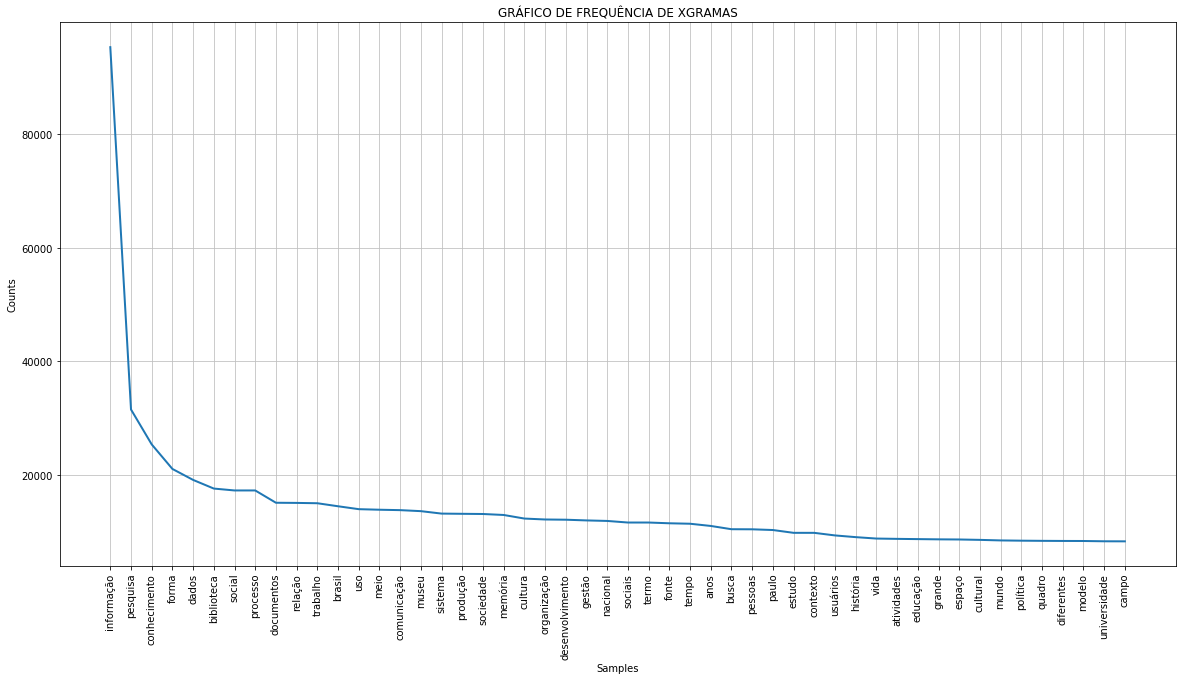

In [15]:
# MOSTRAR O GRÁFICO 

num_freq = 50
#fdist.figure(figsize=(30, 20))
arquivo_grafico = xfrequencia #mudar a variável para representações xgramas v1: total_unigramas v2: total_bigramas v3: total_trigramas v4: xfrequencia
fdist = FreqDist(arquivo_grafico)

fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(20,10)) 
fdist.plot(num_freq,cumulative=False,title='GRÁFICO DE FREQUÊNCIA DE XGRAMAS')

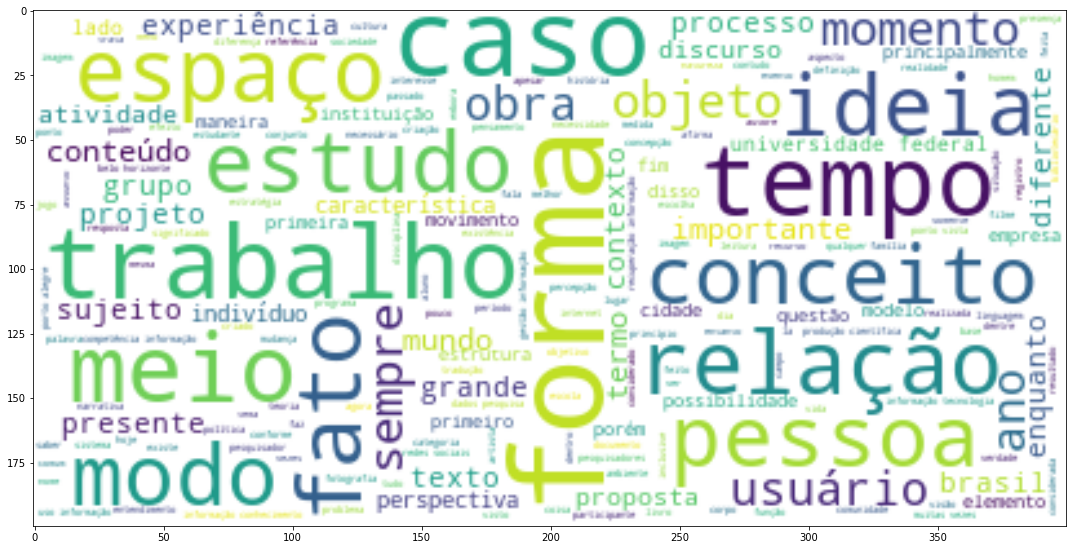

In [16]:
#NUVEM DE PALAVRAS

from wordcloud import WordCloud
cleaned =  ' '.join(xfrequencia)
num_freq = 250
wordcloud = WordCloud(max_font_size=50, max_words=num_freq, background_color="white").generate(cleaned)
fig, ax = plt.subplots(figsize=(15, 20))
ax.imshow(wordcloud, interpolation='nearest')
plt.imshow(wordcloud, interpolation="bilinear")
plt.tight_layout()
plt.savefig("tesesdissertacoes_nuv_2016.png", format = "png")

# CRIANDO O DICIONÁRIO E O CORPUS

In [17]:
#CRIAR DICIONÁRIO 
dictionary = corpora.Dictionary(tokenized_data)
 
#TRANSFORMAR A COLEÇÃO TEXTO COM ID
corpus = [dictionary.doc2bow(text) for text in tokenized_data]

## Latent Dirichlet Allocation (LDA)

### Modelo LDA - 10 tópicos

In [18]:
print("=========================================== Modelo LDA: 10 TÓPICOS ==================================================\n")
num_topics = 10

chunksize = 1000
passes = 40
iterations = 600
eval_every = None  # Don't evaluate model perplexity, takes too much time.
%time model = models.LdaModel(corpus=corpus, id2word=dictionary, chunksize=chunksize, \
                       alpha='auto', eta='auto', \
                       iterations=iterations, num_topics=num_topics, \
                       passes=passes, eval_every=eval_every)

for idx in range(num_topics):
    print("Tópico %s: " % idx, model.print_topic(idx, 10))

=========================================== Modelo LDA: 10 TÓPICOS ==================================================

Wall time: 26min 43s
Tópico 0:  0.003*"museu" + 0.002*"memória" + 0.002*"cultura" + 0.002*"forma" + 0.002*"social" + 0.002*"brasil" + 0.002*"história" + 0.001*"relação" + 0.001*"anos" + 0.001*"cultural"
Tópico 1:  0.000*"legal_regulamente" + 0.000*"instrumento_normativo_legal" + 0.000*"sistema_estadual_arquivos" + 0.000*"estadual_arquivos_localizado" + 0.000*"legais_regulamentam" + 0.000*"normativo_legal_regulamente" + 0.000*"localizado_instrumento_normativo" + 0.000*"quadro_região" + 0.000*"arquivos_localizado" + 0.000*"instrumento_gestão_documentos"
Tópico 2:  0.013*"informação" + 0.004*"pesquisa" + 0.003*"conhecimento" + 0.002*"dados" + 0.002*"biblioteca" + 0.002*"documentos" + 0.002*"forma" + 0.002*"processo" + 0.002*"uso" + 0.002*"gestão"
Tópico 3:  0.000*"beneficiários" + 0.000*"ans" + 0.000*"operadoras" + 0.000*"suplementar" + 0.000*"beneficiário" + 0.000*"opera

### Modelo LDA - 14 tópicos

In [19]:
print("=========================================== Modelo LDA: 14 TÓPICOS ==================================================\n")
num_topics = 14
chunksize = 1000
passes = 40
iterations = 600
eval_every = None  # Don't evaluate model perplexity, takes too much time.
%time model = models.LdaModel(corpus=corpus, id2word=dictionary, chunksize=chunksize, \
                       alpha='auto', eta='auto', \
                       iterations=iterations, num_topics=num_topics, \
                       passes=passes, eval_every=eval_every)

for idx in range(num_topics):
    print("Tópico %s: " % idx, model.print_topic(idx, 10))

=========================================== Modelo LDA: 14 TÓPICOS ==================================================

Wall time: 27min 37s
Tópico 0:  0.001*"ontologia" + 0.000*"gestão_inovação" + 0.000*"ontologias" + 0.000*"prefeitura_belo_horizonte" + 0.000*"prefeitura_belo" + 0.000*"participante_externo" + 0.000*"arquivo_cidade_belo" + 0.000*"cidade_belo" + 0.000*"cidade_belo_horizonte" + 0.000*"arquivo_cidade"
Tópico 1:  0.000*"informação" + 0.000*"comunicação" + 0.000*"pesquisa" + 0.000*"organização" + 0.000*"comunicação_organização_empregados" + 0.000*"processo" + 0.000*"trabalho" + 0.000*"conhecimento" + 0.000*"forma" + 0.000*"documentos"
Tópico 2:  0.000*"segurança_informação" + 0.000*"presbitério" + 0.000*"imagens_movimento" + 0.000*"fase" + 0.000*"presbitério_sul" + 0.000*"sul_paraíba" + 0.000*"presbitério_sul_paraíba" + 0.000*"digitalização" + 0.000*"presbiteriana" + 0.000*"acervo_imagens"
Tópico 3:  0.003*"publicados" + 0.002*"localizado" + 0.002*"web" + 0.001*"periódicos" 

### Modelo LDA - 18 tópicos

In [20]:
print("=========================================== Modelo LDA: 18 TÓPICOS ==================================================\n")
num_topics = 18
chunksize = 1000
passes = 40
iterations = 600
eval_every = None  # Don't evaluate model perplexity, takes too much time.
%time model = models.LdaModel(corpus=corpus, id2word=dictionary, chunksize=chunksize, \
                       alpha='auto', eta='auto', \
                       iterations=iterations, num_topics=num_topics, \
                       passes=passes, eval_every=eval_every)

for idx in range(num_topics):
    print("Tópico %s: " % idx, model.print_topic(idx, 10))

=========================================== Modelo LDA: 18 TÓPICOS ==================================================

Wall time: 35min 46s
Tópico 0:  0.001*"ouro_preto" + 0.001*"ouro" + 0.001*"cecab" + 0.001*"preto" + 0.001*"ufop" + 0.001*"livrocensura" + 0.001*"barroca" + 0.001*"kiss" + 0.000*"curso" + 0.000*"imagens_movimento"
Tópico 1:  0.000*"pesquisa" + 0.000*"conhecimento" + 0.000*"forma" + 0.000*"memória" + 0.000*"informação" + 0.000*"museu" + 0.000*"brasil" + 0.000*"história" + 0.000*"paulo" + 0.000*"anos"
Tópico 2:  0.000*"informação" + 0.000*"documentos" + 0.000*"pesquisa" + 0.000*"brasil" + 0.000*"relação" + 0.000*"processo" + 0.000*"museu" + 0.000*"social" + 0.000*"forma" + 0.000*"nacional"
Tópico 3:  0.004*"publicados" + 0.003*"localizado" + 0.002*"completos_publicados" + 0.002*"completos" + 0.002*"artigos_completos" + 0.002*"artigos_completos_publicados" + 0.002*"publicados_periódicos" + 0.002*"completos_publicados_periódicos" + 0.002*"periódicos" + 0.002*"artigos"
Tópic

### Modelo LDA - 22 tópicos

In [21]:
print("=========================================== Modelo LDA: 22 TÓPICOS ==================================================\n")
num_topics = 22
chunksize = 1000
passes = 40
iterations = 600
eval_every = None  # Don't evaluate model perplexity, takes too much time.
%time model = models.LdaModel(corpus=corpus, id2word=dictionary, chunksize=chunksize, \
                       alpha='auto', eta='auto', \
                       iterations=iterations, num_topics=num_topics, \
                       passes=passes, eval_every=eval_every)

for idx in range(num_topics):
    print("Tópico %s: " % idx, model.print_topic(idx, 10))

=========================================== Modelo LDA: 22 TÓPICOS ==================================================

Wall time: 49min 19s
Tópico 0:  0.001*"casamento" + 0.001*"tpc" + 0.000*"compatibilização" + 0.000*"tcps" + 0.000*"direito_família" + 0.000*"divórcio" + 0.000*"reconciliação" + 0.000*"cddir" + 0.000*"compatíveis" + 0.000*"família"
Tópico 1:  0.001*"carangola" + 0.000*"museu_municipal" + 0.000*"museu_municipais" + 0.000*"municipal_carangola" + 0.000*"museu_municipal_carangola" + 0.000*"natureza_administrativa" + 0.000*"nacional_museu" + 0.000*"administrativa_municipal" + 0.000*"municipais" + 0.000*"carangolense"
Tópico 2:  0.002*"e-books" + 0.001*"portal_capes" + 0.000*"capes" + 0.000*"portal" + 0.000*"e-books_portal" + 0.000*"e-books_portal_capes" + 0.000*"satisfação" + 0.000*"serviço_e-books" + 0.000*"livros_eletrônicos" + 0.000*"coleção_e-books"
Tópico 3:  0.000*"jornalismo" + 0.000*"forma" + 0.000*"biblioteca" + 0.000*"brasil" + 0.000*"cultura" + 0.000*"comunicação"

### Modelo LDA - 26 tópicos

In [22]:
print("=========================================== Modelo LDA: 26 TÓPICOS ==================================================\n")
num_topics = 26
chunksize = 1000
passes = 40
iterations = 600
eval_every = None  # Don't evaluate model perplexity, takes too much time.
%time model = models.LdaModel(corpus=corpus, id2word=dictionary, chunksize=chunksize, \
                       alpha='auto', eta='auto', \
                       iterations=iterations, num_topics=num_topics, \
                       passes=passes, eval_every=eval_every)

for idx in range(num_topics):
    print("Tópico %s: " % idx, model.print_topic(idx, 10))

=========================================== Modelo LDA: 26 TÓPICOS ==================================================

Wall time: 1h 2min 3s
Tópico 0:  0.002*"sustentabilidade" + 0.001*"ges" + 0.001*"sustentável" + 0.000*"guia_exame" + 0.000*"exame_sustentabilidade" + 0.000*"guia_exame_sustentabilidade" + 0.000*"discurso_organizacional" + 0.000*"morin" + 0.000*"premiadas" + 0.000*"desenvolvimento_sustentável"
Tópico 1:  0.000*"fotografia" + 0.000*"indexador" + 0.000*"fotografias" + 0.000*"canção" + 0.000*"descritores" + 0.000*"indexação" + 0.000*"fuzzy" + 0.000*"nabuco" + 0.000*"joaquim_nabuco" + 0.000*"indexadores"
Tópico 2:  0.001*"rossini" + 0.001*"perez" + 0.001*"bergman" + 0.001*"rossini_perez" + 0.001*"bibliófilos" + 0.001*"carangola" + 0.001*"gravura" + 0.001*"cem" + 0.001*"maioridade" + 0.001*"bce"
Tópico 3:  0.005*"publicados" + 0.004*"localizado" + 0.002*"completos_publicados" + 0.002*"completos" + 0.002*"publicados_periódicos" + 0.002*"artigos_completos" + 0.002*"artigos" + 

### Modelo LDA - 30 tópicos

In [23]:
print("=========================================== Modelo LDA: 30 TÓPICOS ==================================================\n")
num_topics = 30

chunksize = 1000
passes = 40
iterations = 600
eval_every = None  # Don't evaluate model perplexity, takes too much time.
%time model = models.LdaModel(corpus=corpus, id2word=dictionary, chunksize=chunksize, \
                       alpha='auto', eta='auto', \
                       iterations=iterations, num_topics=num_topics, \
                       passes=passes, eval_every=eval_every)

for idx in range(num_topics):
    print("Tópico %s: " % idx, model.print_topic(idx, 10))

=========================================== Modelo LDA: 30 TÓPICOS ==================================================

Wall time: 48min 16s
Tópico 0:  0.005*"publicados" + 0.004*"localizado" + 0.003*"completos_publicados" + 0.003*"completos" + 0.002*"artigos" + 0.002*"publicados_periódicos" + 0.002*"artigos_completos" + 0.002*"artigos_completos_publicados" + 0.002*"periódicos" + 0.002*"completos_publicados_periódicos"
Tópico 1:  0.000*"informação" + 0.000*"dados" + 0.000*"pesquisa" + 0.000*"cinema" + 0.000*"social" + 0.000*"memória" + 0.000*"processo" + 0.000*"tempo" + 0.000*"brasil" + 0.000*"conhecimento"
Tópico 2:  0.001*"centro_memória" + 0.000*"centros_memória" + 0.000*"cemef" + 0.000*"memória_documentação" + 0.000*"centros_memória_documentação" + 0.000*"escola_educação" + 0.000*"linhales" + 0.000*"garimpando" + 0.000*"projeto_garimpando" + 0.000*"garimpando_memórias"
Tópico 3:  0.001*"pmlllb" + 0.001*"livro_leitura" + 0.000*"plenárias" + 0.000*"saraus" + 0.000*"leitura_literatura"

### Modelo LDA - 34 tópicos

In [24]:
print("=========================================== Modelo LDA: 34 TÓPICOS ==================================================\n")
num_topics = 34

chunksize = 1000
passes = 40
iterations = 600
eval_every = None  # Don't evaluate model perplexity, takes too much time.
%time model = models.LdaModel(corpus=corpus, id2word=dictionary, chunksize=chunksize, \
                       alpha='auto', eta='auto', \
                       iterations=iterations, num_topics=num_topics, \
                       passes=passes, eval_every=eval_every)

for idx in range(num_topics):
    print("Tópico %s: " % idx, model.print_topic(idx, 10))

=========================================== Modelo LDA: 34 TÓPICOS ==================================================

Wall time: 56min 8s
Tópico 0:  0.003*"sustentabilidade" + 0.001*"ges" + 0.001*"sustentável" + 0.001*"riverão" + 0.000*"carrilho" + 0.000*"heitor" + 0.000*"heitor_carrilho" + 0.000*"psiquiatria" + 0.000*"serviço_referência" + 0.000*"hctp"
Tópico 1:  0.003*"gif" + 0.003*"gifs" + 0.002*"animados" + 0.002*"gifs_animados" + 0.001*"bergman" + 0.001*"animado" + 0.001*"gif_animado" + 0.001*"spammer" + 0.001*"animações" + 0.001*"deleuze"
Tópico 2:  0.002*"engenharia" + 0.002*"ordenação" + 0.001*"ordenação_documentos" + 0.001*"eng" + 0.001*"cutter" + 0.000*"classificação_bibliográfica" + 0.000*"subáreas" + 0.000*"estantes" + 0.000*"dewey" + 0.000*"ing_eng"
Tópico 3:  0.000*"informação" + 0.000*"documentos" + 0.000*"pesquisa" + 0.000*"conhecimento" + 0.000*"web" + 0.000*"digital" + 0.000*"termo" + 0.000*"citação_web" + 0.000*"políticas" + 0.000*"direito"
Tópico 4:  0.001*"casamen

### Modelo LDA - 38 tópicos

In [25]:
print("=========================================== Modelo LDA: 38 TÓPICOS ==================================================\n")
num_topics = 38

chunksize = 1000
passes = 40
iterations = 600
eval_every = None  # Don't evaluate model perplexity, takes too much time.
%time model = models.LdaModel(corpus=corpus, id2word=dictionary, chunksize=chunksize, \
                       alpha='auto', eta='auto', \
                       iterations=iterations, num_topics=num_topics, \
                       passes=passes, eval_every=eval_every)

for idx in range(num_topics):
    print("Tópico %s: " % idx, model.print_topic(idx, 10))

=========================================== Modelo LDA: 38 TÓPICOS ==================================================

Wall time: 1h 8min 56s
Tópico 0:  0.001*"murilo" + 0.001*"sublimação" + 0.001*"murilo_mendes" + 0.000*"ferenczi" + 0.000*"adorno" + 0.000*"pulsional" + 0.000*"mamm" + 0.000*"indivíduo_globalizado" + 0.000*"multifacetado_conexão" + 0.000*"pulsão_morte"
Tópico 1:  0.013*"informação" + 0.003*"pesquisa" + 0.003*"conhecimento" + 0.003*"biblioteca" + 0.002*"forma" + 0.002*"processo" + 0.002*"social" + 0.002*"documentos" + 0.002*"sociedade" + 0.002*"organização"
Tópico 2:  0.003*"jogo" + 0.001*"gameplay" + 0.001*"jogador" + 0.001*"game" + 0.001*"games" + 0.001*"jogadores" + 0.001*"jogar" + 0.001*"avatares" + 0.001*"paleontologia" + 0.001*"jogos"
Tópico 3:  0.000*"garantia_semântica" + 0.000*"wittgenstein_bakhtin" + 0.000*"autárquica_fundacional_poder" + 0.000*"fundacional_poder" + 0.000*"fundacional_poder_executivo" + 0.000*"conceito_garantia" + 0.000*"conhecimento_governo_mi

### Modelo LDA - 42 tópicos

In [26]:
print("=========================================== Modelo LDA: 42 TÓPICOS ==================================================\n")
num_topics = 42

chunksize = 1000
passes = 40
iterations = 600
eval_every = None  # Don't evaluate model perplexity, takes too much time.
%time model = models.LdaModel(corpus=corpus, id2word=dictionary, chunksize=chunksize, \
                       alpha='auto', eta='auto', \
                       iterations=iterations, num_topics=num_topics, \
                       passes=passes, eval_every=eval_every)

for idx in range(num_topics):
    print("Tópico %s: " % idx, model.print_topic(idx, 10))




=========================================== Modelo LDA: 42 TÓPICOS ==================================================

Wall time: 1h 14min 12s
Tópico 0:  0.004*"inovação" + 0.003*"filme" + 0.002*"making" + 0.002*"acv" + 0.001*"imagens" + 0.001*"fase" + 0.001*"família" + 0.001*"gestão_inovação" + 0.001*"movimento" + 0.001*"defensoria"
Tópico 1:  0.000*"informação" + 0.000*"comunicação" + 0.000*"cidade" + 0.000*"sociais" + 0.000*"pesquisa" + 0.000*"trabalho" + 0.000*"social" + 0.000*"memória" + 0.000*"anos" + 0.000*"forma"
Tópico 2:  0.000*"informação" + 0.000*"biblioteca" + 0.000*"livro" + 0.000*"pesquisa" + 0.000*"processo" + 0.000*"dados" + 0.000*"museu" + 0.000*"brasil" + 0.000*"avaliação" + 0.000*"forma"
Tópico 3:  0.001*"informação_contábil-financeira" + 0.001*"contábil-financeira" + 0.000*"observatórios" + 0.000*"observatórios_sociais" + 0.000*"observatório" + 0.000*"parâmetro" + 0.000*"informação_contábil-financeira_natureza" + 0.000*"contábil-financeira_natureza" + 0.000*"cyberg

Tópico 38:  0.000*"informação" + 0.000*"dados" + 0.000*"pesquisa" + 0.000*"conhecimento" + 0.000*"busca" + 0.000*"forma" + 0.000*"processo" + 0.000*"uso" + 0.000*"meio" + 0.000*"social"
Tópico 39:  0.000*"informação" + 0.000*"biblioteca" + 0.000*"conhecimento" + 0.000*"sociedade" + 0.000*"processo" + 0.000*"forma" + 0.000*"pesquisa" + 0.000*"memória" + 0.000*"usuários" + 0.000*"relação"
Tópico 40:  0.000*"informação" + 0.000*"pesquisa" + 0.000*"forma" + 0.000*"memória" + 0.000*"processo" + 0.000*"produção" + 0.000*"relação" + 0.000*"trabalho" + 0.000*"conhecimento" + 0.000*"dados"
Tópico 41:  0.002*"avignon" + 0.002*"festival" + 0.001*"ipad" + 0.001*"religião" + 0.001*"vilar" + 0.001*"religiões" + 0.001*"impressa" + 0.001*"desktop" + 0.001*"desktop_site" + 0.001*"jean_vilar"


## Imprimir o melhor resultado - LDA

In [ ]:
#IMPRESSÃO DO MELHOR RESULTADO
print("=========================================== Modelo LDA: 12 TÓPICOS ==================================================\n")
num_topics = 12 

chunksize = 1000
passes = 40
iterations = 600
eval_every = None  # Don't evaluate model perplexity, takes too much time.
%time model = models.LdaModel(corpus=corpus, id2word=dictionary, chunksize=chunksize, \
                       alpha='auto', eta='auto', \
                       iterations=iterations, num_topics=num_topics, \
                       passes=passes, eval_every=eval_every)

for idx in range(num_topics):
    print("Tópico %s: " % idx, model.print_topic(idx, 10))

### PyLDAvis

Criando a visulização dos tópicos do modelo LDA.

In [ ]:
#IMPORTAR BIBLIOTECA PARA VISUALIZAÇÃO DOS TÓPICOS LDA
import pyLDAvis
import pyLDAvis.gensim  
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
#VISUALIZAR NO GRÁFICO PYLDAVIS
pyLDAvis.enable_notebook()
%time vis = pyLDAvis.gensim.prepare(model, corpus, dictionary)
pyLDAvis.save_html(vis, 'lda_tesesdissertacoes_2016.html')
vis

## Latent Semantic Indexing (LSI)


### Modelo LSI - 10 tópicos

In [27]:
print("=========================================== Modelo LSI: 10 TÓPICOS ==================================================\n")

NUM_TOPICS = 10
%time lsi_model = models.LsiModel(corpus=corpus,num_topics=NUM_TOPICS, id2word=dictionary)
for idx in range(NUM_TOPICS):
    print("Tópico #%s: " % idx, lsi_model.print_topic(idx, 10))

=========================================== Modelo LSI: 10 TÓPICOS ==================================================

Wall time: 8min 23s
Tópico #0:  0.664*"informação" + 0.185*"pesquisa" + 0.156*"conhecimento" + 0.116*"dados" + 0.107*"biblioteca" + 0.105*"forma" + 0.098*"processo" + 0.092*"uso" + 0.085*"trabalho" + 0.082*"social"
Tópico #1:  -0.395*"publicados" + -0.293*"localizado" + -0.203*"artigos" + -0.202*"completos" + -0.201*"completos_publicados" + -0.189*"periódicos" + 0.184*"informação" + -0.177*"publicados_periódicos" + -0.177*"artigos_completos" + -0.177*"artigos_completos_publicados"
Tópico #2:  0.517*"informação" + -0.357*"museu" + -0.149*"memória" + -0.135*"cultura" + -0.118*"cultural" + -0.115*"arte" + -0.114*"história" + -0.112*"brasil" + -0.102*"nacional" + -0.097*"anos"
Tópico #3:  -0.541*"documentos" + -0.265*"gestão" + -0.260*"museu" + -0.220*"arquivo" + -0.205*"arquivos" + 0.161*"biblioteca" + -0.155*"gestão_documentos" + -0.097*"administração" + -0.086*"informaç

### Modelo LSI - 14 tópicos

In [28]:
print("=========================================== Modelo LSI: 14 TÓPICOS ==================================================\n")

NUM_TOPICS = 14
%time lsi_model = models.LsiModel(corpus=corpus,num_topics=NUM_TOPICS, id2word=dictionary)
for idx in range(NUM_TOPICS):
    print("Tópico #%s: " % idx, lsi_model.print_topic(idx, 10))

=========================================== Modelo LSI: 14 TÓPICOS ==================================================

Wall time: 8min 53s
Tópico #0:  0.664*"informação" + 0.185*"pesquisa" + 0.156*"conhecimento" + 0.116*"dados" + 0.107*"biblioteca" + 0.105*"forma" + 0.098*"processo" + 0.092*"uso" + 0.085*"trabalho" + 0.082*"social"
Tópico #1:  -0.395*"publicados" + -0.293*"localizado" + -0.203*"artigos" + -0.202*"completos" + -0.201*"completos_publicados" + -0.189*"periódicos" + 0.184*"informação" + -0.177*"publicados_periódicos" + -0.177*"artigos_completos" + -0.177*"artigos_completos_publicados"
Tópico #2:  0.517*"informação" + -0.357*"museu" + -0.149*"memória" + -0.135*"cultura" + -0.118*"cultural" + -0.115*"arte" + -0.114*"história" + -0.112*"brasil" + -0.102*"nacional" + -0.097*"anos"
Tópico #3:  -0.541*"documentos" + -0.265*"gestão" + -0.260*"museu" + -0.220*"arquivo" + -0.205*"arquivos" + 0.161*"biblioteca" + -0.155*"gestão_documentos" + -0.097*"administração" + -0.086*"informaç

### Modelo LSI - 18 tópicos

In [29]:
print("=========================================== Modelo LSI: 18 TÓPICOS ==================================================\n")

NUM_TOPICS = 18
%time lsi_model = models.LsiModel(corpus=corpus,num_topics=NUM_TOPICS, id2word=dictionary)
for idx in range(NUM_TOPICS):
    print("Tópico #%s: " % idx, lsi_model.print_topic(idx, 10))

=========================================== Modelo LSI: 18 TÓPICOS ==================================================

Wall time: 9min 21s
Tópico #0:  0.664*"informação" + 0.185*"pesquisa" + 0.156*"conhecimento" + 0.116*"dados" + 0.107*"biblioteca" + 0.105*"forma" + 0.098*"processo" + 0.092*"uso" + 0.085*"trabalho" + 0.082*"social"
Tópico #1:  -0.395*"publicados" + -0.293*"localizado" + -0.203*"artigos" + -0.202*"completos" + -0.201*"completos_publicados" + -0.189*"periódicos" + 0.184*"informação" + -0.177*"publicados_periódicos" + -0.177*"artigos_completos" + -0.177*"artigos_completos_publicados"
Tópico #2:  -0.517*"informação" + 0.357*"museu" + 0.149*"memória" + 0.135*"cultura" + 0.118*"cultural" + 0.115*"arte" + 0.114*"história" + 0.112*"brasil" + 0.102*"nacional" + 0.097*"anos"
Tópico #3:  -0.541*"documentos" + -0.265*"gestão" + -0.260*"museu" + -0.220*"arquivo" + -0.205*"arquivos" + 0.161*"biblioteca" + -0.155*"gestão_documentos" + -0.097*"administração" + -0.086*"informação" + -0

### Modelo LSI - 22 tópicos

In [30]:
print("=========================================== Modelo LSI: 22 TÓPICOS ==================================================\n")

NUM_TOPICS = 22
%time lsi_model = models.LsiModel(corpus=corpus,num_topics=NUM_TOPICS, id2word=dictionary)
for idx in range(NUM_TOPICS):
    print("Tópico #%s: " % idx, lsi_model.print_topic(idx, 10))

=========================================== Modelo LSI: 22 TÓPICOS ==================================================

Wall time: 10min 10s
Tópico #0:  0.664*"informação" + 0.185*"pesquisa" + 0.156*"conhecimento" + 0.116*"dados" + 0.107*"biblioteca" + 0.105*"forma" + 0.098*"processo" + 0.092*"uso" + 0.085*"trabalho" + 0.082*"social"
Tópico #1:  -0.395*"publicados" + -0.293*"localizado" + -0.203*"artigos" + -0.202*"completos" + -0.201*"completos_publicados" + -0.189*"periódicos" + 0.184*"informação" + -0.177*"publicados_periódicos" + -0.177*"artigos_completos" + -0.177*"artigos_completos_publicados"
Tópico #2:  -0.517*"informação" + 0.357*"museu" + 0.149*"memória" + 0.135*"cultura" + 0.118*"cultural" + 0.115*"arte" + 0.114*"história" + 0.112*"brasil" + 0.102*"nacional" + 0.097*"anos"
Tópico #3:  0.541*"documentos" + 0.265*"gestão" + 0.260*"museu" + 0.220*"arquivo" + 0.205*"arquivos" + -0.161*"biblioteca" + 0.155*"gestão_documentos" + 0.097*"administração" + 0.086*"informação" + 0.082*"l

### Modelo LSI - 26 tópicos

In [31]:
print("=========================================== Modelo LSI: 26 TÓPICOS ==================================================\n")

NUM_TOPICS = 26
%time lsi_model = models.LsiModel(corpus=corpus,num_topics=NUM_TOPICS, id2word=dictionary)
for idx in range(NUM_TOPICS):
    print("Tópico #%s: " % idx, lsi_model.print_topic(idx, 10))

=========================================== Modelo LSI: 26 TÓPICOS ==================================================

Wall time: 10min 50s
Tópico #0:  0.664*"informação" + 0.185*"pesquisa" + 0.156*"conhecimento" + 0.116*"dados" + 0.107*"biblioteca" + 0.105*"forma" + 0.098*"processo" + 0.092*"uso" + 0.085*"trabalho" + 0.082*"social"
Tópico #1:  -0.395*"publicados" + -0.293*"localizado" + -0.203*"artigos" + -0.202*"completos" + -0.201*"completos_publicados" + -0.189*"periódicos" + 0.184*"informação" + -0.177*"publicados_periódicos" + -0.177*"artigos_completos" + -0.177*"artigos_completos_publicados"
Tópico #2:  -0.517*"informação" + 0.357*"museu" + 0.149*"memória" + 0.135*"cultura" + 0.118*"cultural" + 0.115*"arte" + 0.114*"história" + 0.112*"brasil" + 0.102*"nacional" + 0.097*"anos"
Tópico #3:  -0.541*"documentos" + -0.266*"gestão" + -0.260*"museu" + -0.220*"arquivo" + -0.205*"arquivos" + 0.161*"biblioteca" + -0.155*"gestão_documentos" + -0.097*"administração" + -0.086*"informação" + -

### Modelo LSI - 30 tópicos

In [32]:
print("=========================================== Modelo LSI: 30 TÓPICOS ==================================================\n")

NUM_TOPICS = 30
%time lsi_model = models.LsiModel(corpus=corpus,num_topics=NUM_TOPICS, id2word=dictionary)
for idx in range(NUM_TOPICS):
    print("Tópico #%s: " % idx, lsi_model.print_topic(idx, 10))

=========================================== Modelo LSI: 30 TÓPICOS ==================================================

Wall time: 11min 49s
Tópico #0:  0.664*"informação" + 0.185*"pesquisa" + 0.156*"conhecimento" + 0.116*"dados" + 0.107*"biblioteca" + 0.105*"forma" + 0.098*"processo" + 0.092*"uso" + 0.085*"trabalho" + 0.082*"social"
Tópico #1:  -0.395*"publicados" + -0.293*"localizado" + -0.203*"artigos" + -0.202*"completos" + -0.201*"completos_publicados" + -0.189*"periódicos" + 0.184*"informação" + -0.177*"publicados_periódicos" + -0.177*"artigos_completos" + -0.177*"artigos_completos_publicados"
Tópico #2:  0.517*"informação" + -0.357*"museu" + -0.149*"memória" + -0.135*"cultura" + -0.118*"cultural" + -0.115*"arte" + -0.114*"história" + -0.112*"brasil" + -0.102*"nacional" + -0.097*"anos"
Tópico #3:  -0.541*"documentos" + -0.265*"gestão" + -0.260*"museu" + -0.220*"arquivo" + -0.205*"arquivos" + 0.161*"biblioteca" + -0.155*"gestão_documentos" + -0.097*"administração" + -0.086*"informa

### Modelo LSI - 34 tópicos

In [33]:
print("=========================================== Modelo LSI: 34 TÓPICOS ==================================================\n")

NUM_TOPICS = 34
%time lsi_model = models.LsiModel(corpus=corpus,num_topics=NUM_TOPICS, id2word=dictionary)
for idx in range(NUM_TOPICS):
    print("Tópico #%s: " % idx, lsi_model.print_topic(idx, 10))

=========================================== Modelo LSI: 34 TÓPICOS ==================================================

Wall time: 12min 52s
Tópico #0:  0.664*"informação" + 0.185*"pesquisa" + 0.156*"conhecimento" + 0.116*"dados" + 0.107*"biblioteca" + 0.105*"forma" + 0.098*"processo" + 0.092*"uso" + 0.085*"trabalho" + 0.082*"social"
Tópico #1:  0.395*"publicados" + 0.293*"localizado" + 0.203*"artigos" + 0.202*"completos" + 0.201*"completos_publicados" + 0.189*"periódicos" + -0.184*"informação" + 0.177*"publicados_periódicos" + 0.177*"artigos_completos" + 0.177*"artigos_completos_publicados"
Tópico #2:  0.517*"informação" + -0.357*"museu" + -0.149*"memória" + -0.135*"cultura" + -0.118*"cultural" + -0.115*"arte" + -0.114*"história" + -0.112*"brasil" + -0.102*"nacional" + -0.097*"anos"
Tópico #3:  0.541*"documentos" + 0.266*"gestão" + 0.260*"museu" + 0.220*"arquivo" + 0.205*"arquivos" + -0.161*"biblioteca" + 0.155*"gestão_documentos" + 0.097*"administração" + 0.086*"informação" + 0.082*"l

### Modelo LSI - 38 tópicos

In [34]:
print("=========================================== Modelo LSI: 38 TÓPICOS ==================================================\n")

NUM_TOPICS = 38
%time lsi_model = models.LsiModel(corpus=corpus,num_topics=NUM_TOPICS, id2word=dictionary)
for idx in range(NUM_TOPICS):
    print("Tópico #%s: " % idx, lsi_model.print_topic(idx, 10))

=========================================== Modelo LSI: 38 TÓPICOS ==================================================

Wall time: 13min 42s
Tópico #0:  0.664*"informação" + 0.185*"pesquisa" + 0.156*"conhecimento" + 0.116*"dados" + 0.107*"biblioteca" + 0.105*"forma" + 0.098*"processo" + 0.092*"uso" + 0.085*"trabalho" + 0.082*"social"
Tópico #1:  -0.395*"publicados" + -0.293*"localizado" + -0.203*"artigos" + -0.202*"completos" + -0.201*"completos_publicados" + -0.189*"periódicos" + 0.184*"informação" + -0.177*"publicados_periódicos" + -0.177*"artigos_completos" + -0.177*"artigos_completos_publicados"
Tópico #2:  0.517*"informação" + -0.357*"museu" + -0.149*"memória" + -0.135*"cultura" + -0.118*"cultural" + -0.115*"arte" + -0.114*"história" + -0.112*"brasil" + -0.102*"nacional" + -0.097*"anos"
Tópico #3:  0.541*"documentos" + 0.265*"gestão" + 0.260*"museu" + 0.220*"arquivo" + 0.205*"arquivos" + -0.161*"biblioteca" + 0.155*"gestão_documentos" + 0.097*"administração" + 0.086*"informação" + 

### Modelo LSI - 42 tópicos

In [35]:
print("=========================================== Modelo LSI: 42 TÓPICOS ==================================================\n")

NUM_TOPICS = 42
%time lsi_model = models.LsiModel(corpus=corpus,num_topics=NUM_TOPICS, id2word=dictionary)
for idx in range(NUM_TOPICS):
    print("Tópico #%s: " % idx, lsi_model.print_topic(idx, 10))

=========================================== Modelo LSI: 42 TÓPICOS ==================================================

Wall time: 27min 39s
Tópico #0:  0.664*"informação" + 0.185*"pesquisa" + 0.156*"conhecimento" + 0.116*"dados" + 0.107*"biblioteca" + 0.105*"forma" + 0.098*"processo" + 0.092*"uso" + 0.085*"trabalho" + 0.082*"social"
Tópico #1:  0.395*"publicados" + 0.293*"localizado" + 0.203*"artigos" + 0.202*"completos" + 0.201*"completos_publicados" + 0.189*"periódicos" + -0.184*"informação" + 0.177*"publicados_periódicos" + 0.177*"artigos_completos" + 0.177*"artigos_completos_publicados"
Tópico #2:  -0.517*"informação" + 0.357*"museu" + 0.149*"memória" + 0.135*"cultura" + 0.118*"cultural" + 0.115*"arte" + 0.114*"história" + 0.112*"brasil" + 0.102*"nacional" + 0.097*"anos"
Tópico #3:  -0.541*"documentos" + -0.265*"gestão" + -0.260*"museu" + -0.220*"arquivo" + -0.205*"arquivos" + 0.161*"biblioteca" + -0.155*"gestão_documentos" + -0.097*"administração" + -0.086*"informação" + -0.082*"l

Tópico #40:  0.201*"making" + -0.152*"fotografia" + 0.140*"filme" + -0.127*"comunicação" + -0.119*"livro" + 0.119*"cinema" + 0.119*"memória" + -0.115*"leitura" + -0.113*"imagem" + -0.109*"amado"
Tópico #41:  0.166*"e-books" + 0.142*"funk" + 0.136*"portal" + -0.135*"usuários" + 0.128*"belo" + 0.128*"belo_horizonte" + 0.127*"horizonte" + -0.111*"cultura" + 0.111*"pedra" + 0.105*"revisão"


## Imprimir o melhor resultado - LSI

In [ ]:
#MELHOR LSI
print("=========================================== Modelo LSI: XX TÓPICOS ==================================================\n")

NUM_TOPICS = 34
%time lsi_model = models.LsiModel(corpus=corpus,num_topics=NUM_TOPICS, id2word=dictionary)
for idx in range(NUM_TOPICS):
    print("Tópico #%s: " % idx, lsi_model.print_topic(idx, 10))